In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import edhec_risk_kit as erk

In [4]:
return_df = erk.get_ffme_returns()
return_df

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270
...,...,...
2018-08,0.0241,0.0234
2018-09,-0.0168,0.0087
2018-10,-0.1002,-0.0657
2018-11,-0.0365,0.0253


In [5]:
erk.drawdown(return_df['SmallCap'])['drawdown'].min()

-0.8330007793945303

# Return Distribution

In [6]:
hfi_df = erk.get_hfi_returns()
hfi_df

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07,0.0021,-0.0058,0.0093,0.0040,-0.0010,0.0055,0.0022,-0.0014,0.0067,-0.0021,0.0045,-0.0052,0.0018
2018-08,0.0024,0.0166,0.0002,-0.0277,0.0004,0.0011,0.0017,-0.0007,0.0035,0.0050,-0.0002,-0.0214,0.0015
2018-09,0.0034,-0.0054,0.0050,-0.0110,-0.0016,0.0032,0.0036,0.0006,-0.0023,0.0028,0.0018,0.0036,-0.0022


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120837f40>,
      dtype=object)

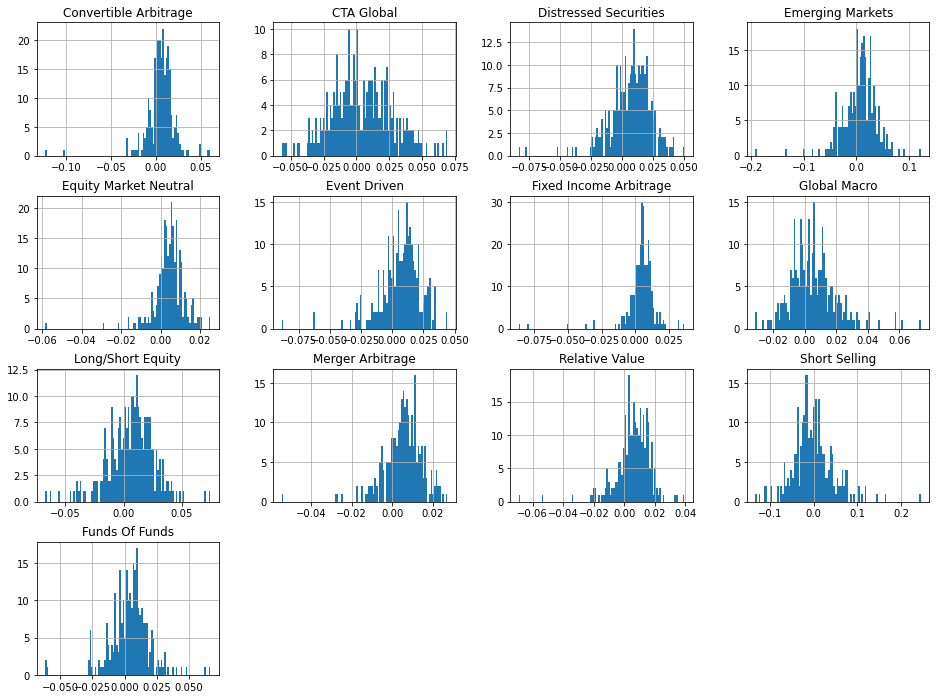

In [7]:
hfi_df.hist(figsize=(16, 12), bins=100)

# Skewness, Kurtosis and Jarque-bera

In [8]:
def skewness(x):
    mu = x.mean()
    sigma = x.std()
    N = len(x)
    return ((x - mu)**3).sum() / (N * sigma**3)

def kurtosis(x):
    mu = x.mean()
    sigma = x.std()
    N = len(x)
    return ((x - mu) ** 4).sum() / (N * sigma**4)

def is_normal_distribution(x, alpha=0.01):
    statistic_value, p_value = stats.jarque_bera(x)
    return p_value > alpha

    


In [9]:
pd.DataFrame(data={
    'mean': hfi_df.mean(),
    'median': hfi_df.median(),
    'skewness_side': np.where(hfi_df.mean() > hfi_df.median(), 'Positive', 'Negative'),
    'skewness': hfi_df.apply(skewness),
    'kurtosis': hfi_df.apply(kurtosis),
    'is_normal_distribution': hfi_df.apply(is_normal_distribution)
})

,mean,median,skewness_side,skewness,kurtosis,is_normal_distribution
Convertible Arbitrage,0.005508,0.0065,Negative,-2.624552,23.104130,False
CTA Global,0.004074,0.0014,Positive,0.172709,2.930547,True
Distressed Securities,0.006946,0.0089,Negative,-1.293430,7.830098,False
Emerging Markets,0.006253,0.0096,Negative,-1.160418,9.180574,False
Equity Market Neutral,0.004498,0.0051,Negative,-2.112330,17.087865,False
Event Driven,0.006344,0.0084,Negative,-1.401124,7.974835,False
Fixed Income Arbitrage,0.004365,0.0055,Negative,-3.917868,29.615694,False
Global Macro,0.005403,0.0038,Positive,0.977321,5.698099,False
Long/Short Equity,0.006331,0.0079,Negative,-0.388003,4.489556,False
Merger Arbitrage,0.005356,0.0060,Negative,-1.312562,8.672620,False


# Semi-deviation

In [10]:
def semi_deviation(x):
    return x[x < 0].std()

In [11]:
pd.DataFrame(data={
    'standard_deviation': hfi_df.std(),
    'semi_deviation': hfi_df.apply(semi_deviation)
})

,standard_deviation,semi_deviation
Convertible Arbitrage,0.016567,0.019687
CTA Global,0.023335,0.012495
Distressed Securities,0.017042,0.015288
Emerging Markets,0.032538,0.028197
Equity Market Neutral,0.008130,0.009667
Event Driven,0.016744,0.015536
Fixed Income Arbitrage,0.011539,0.017940
Global Macro,0.014722,0.006612
Long/Short Equity,0.019935,0.014133
Merger Arbitrage,0.009619,0.008954


# VaR and CVaR

## Historic VaR

In [12]:
def historic_var(return_series: pd.Series, alpha: float = 0.95) -> float:
    return abs(return_series.quantile(1 - alpha))



## Gaussian VaR

In [13]:
def gaussian_var(return_series: pd.Series, alpha: float = 0.95) -> float:
    mu = return_series.mean()
    sigma = return_series.std()
    return abs(stats.norm.ppf(1 - alpha, loc=mu, scale=sigma))

## Historic CVaR

In [14]:
def historic_cvar(return_series: pd.Series, alpha: float = 0.95) -> float:
    percentile = return_series.quantile(1 - alpha)
    return abs(return_series[return_series < percentile].mean())



In [15]:
pd.DataFrame(data={
    'historic_var': hfi_df.apply(historic_var),
    'gaussian_var': hfi_df.apply(gaussian_var),
    'historic_cvar': hfi_df.apply(historic_cvar)
})

,historic_var,gaussian_var,historic_cvar
Convertible Arbitrage,0.01576,0.021743,0.036550
CTA Global,0.03169,0.034308,0.041264
Distressed Securities,0.01966,0.021085,0.036429
Emerging Markets,0.04247,0.047266,0.072364
Equity Market Neutral,0.00814,0.008875,0.016879
Event Driven,0.02535,0.021196,0.038336
Fixed Income Arbitrage,0.00787,0.014615,0.028257
Global Macro,0.01499,0.018813,0.020629
Long/Short Equity,0.02598,0.026459,0.041943
Merger Arbitrage,0.01047,0.010466,0.019143
